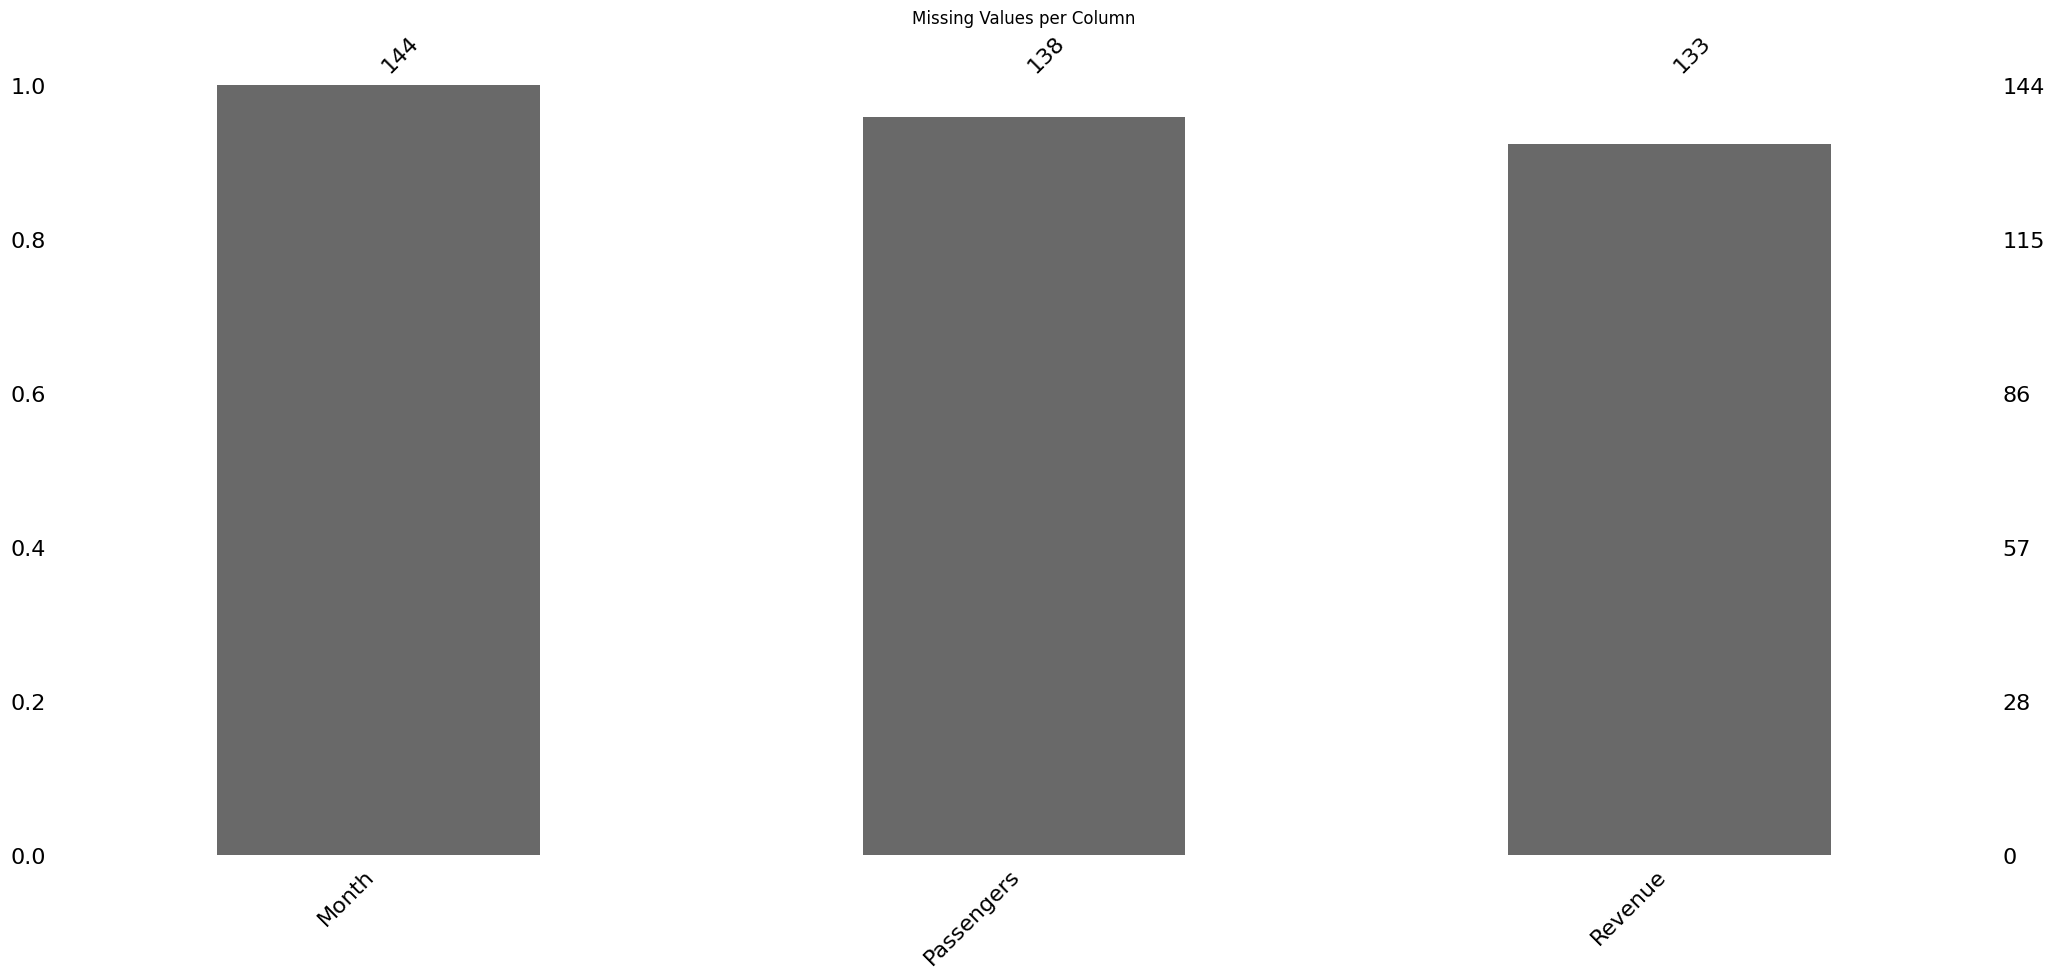

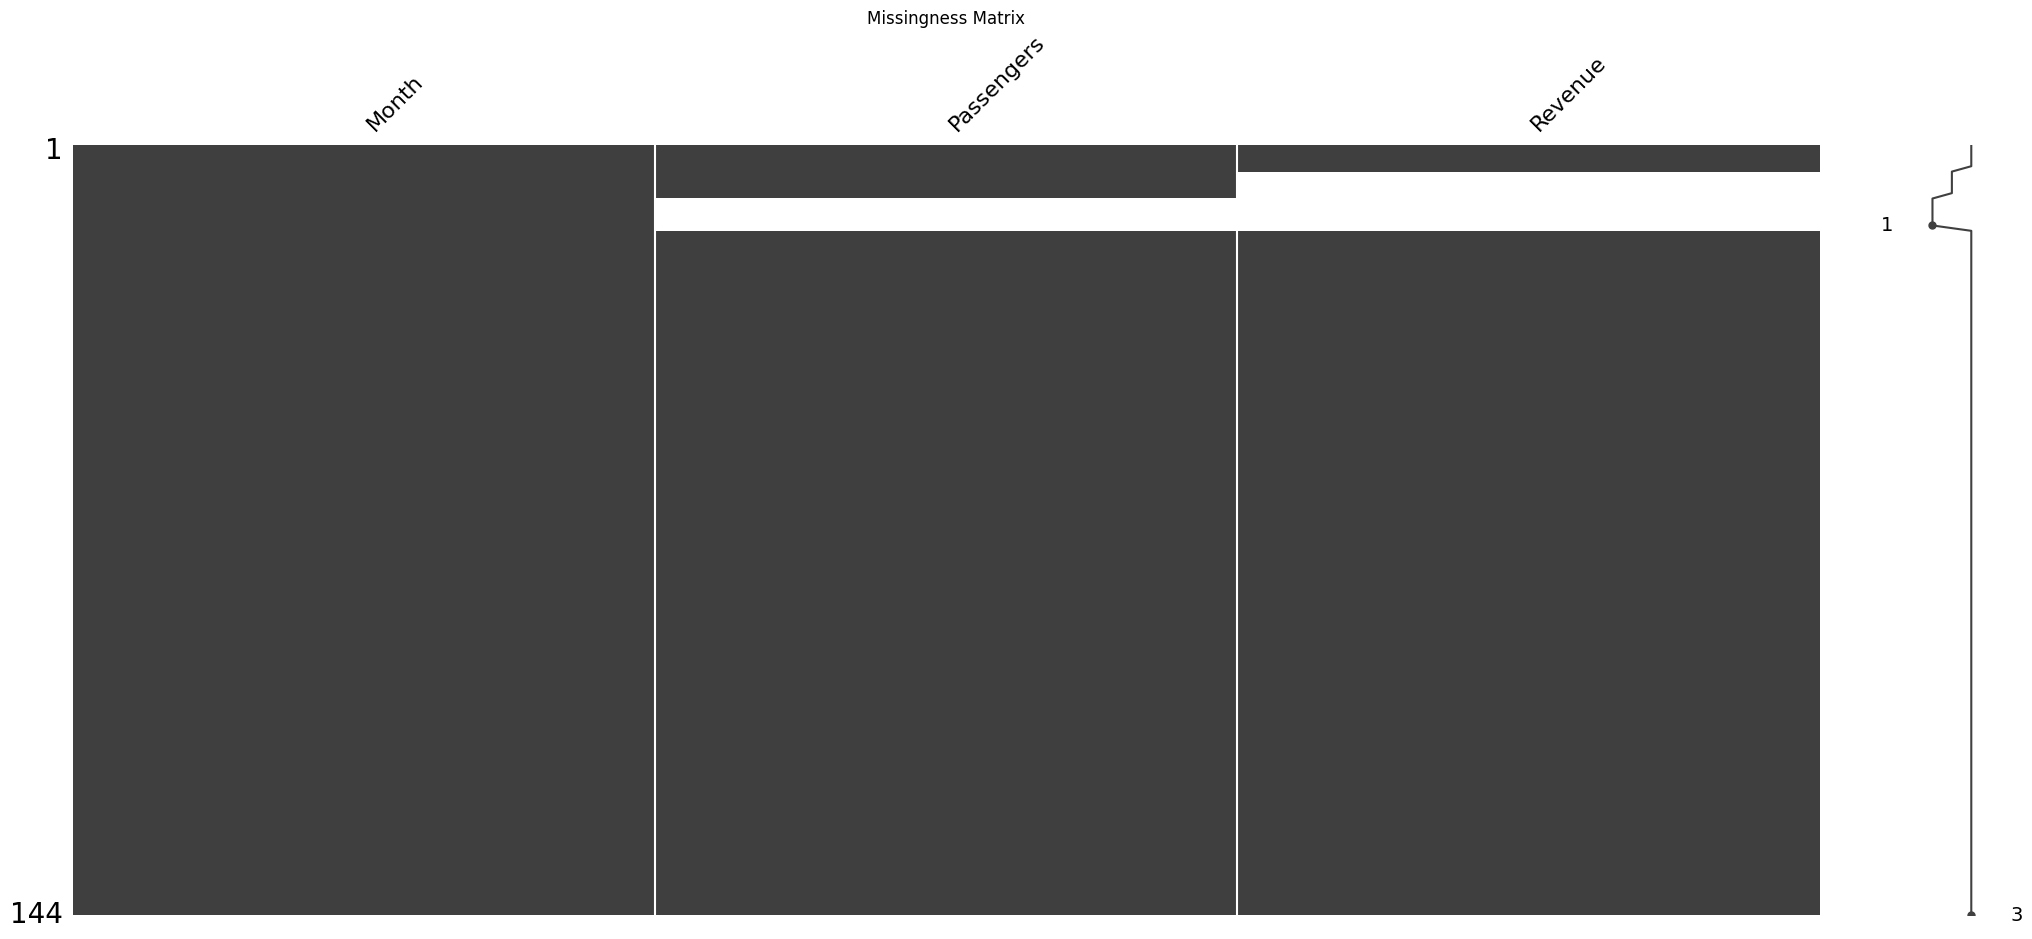

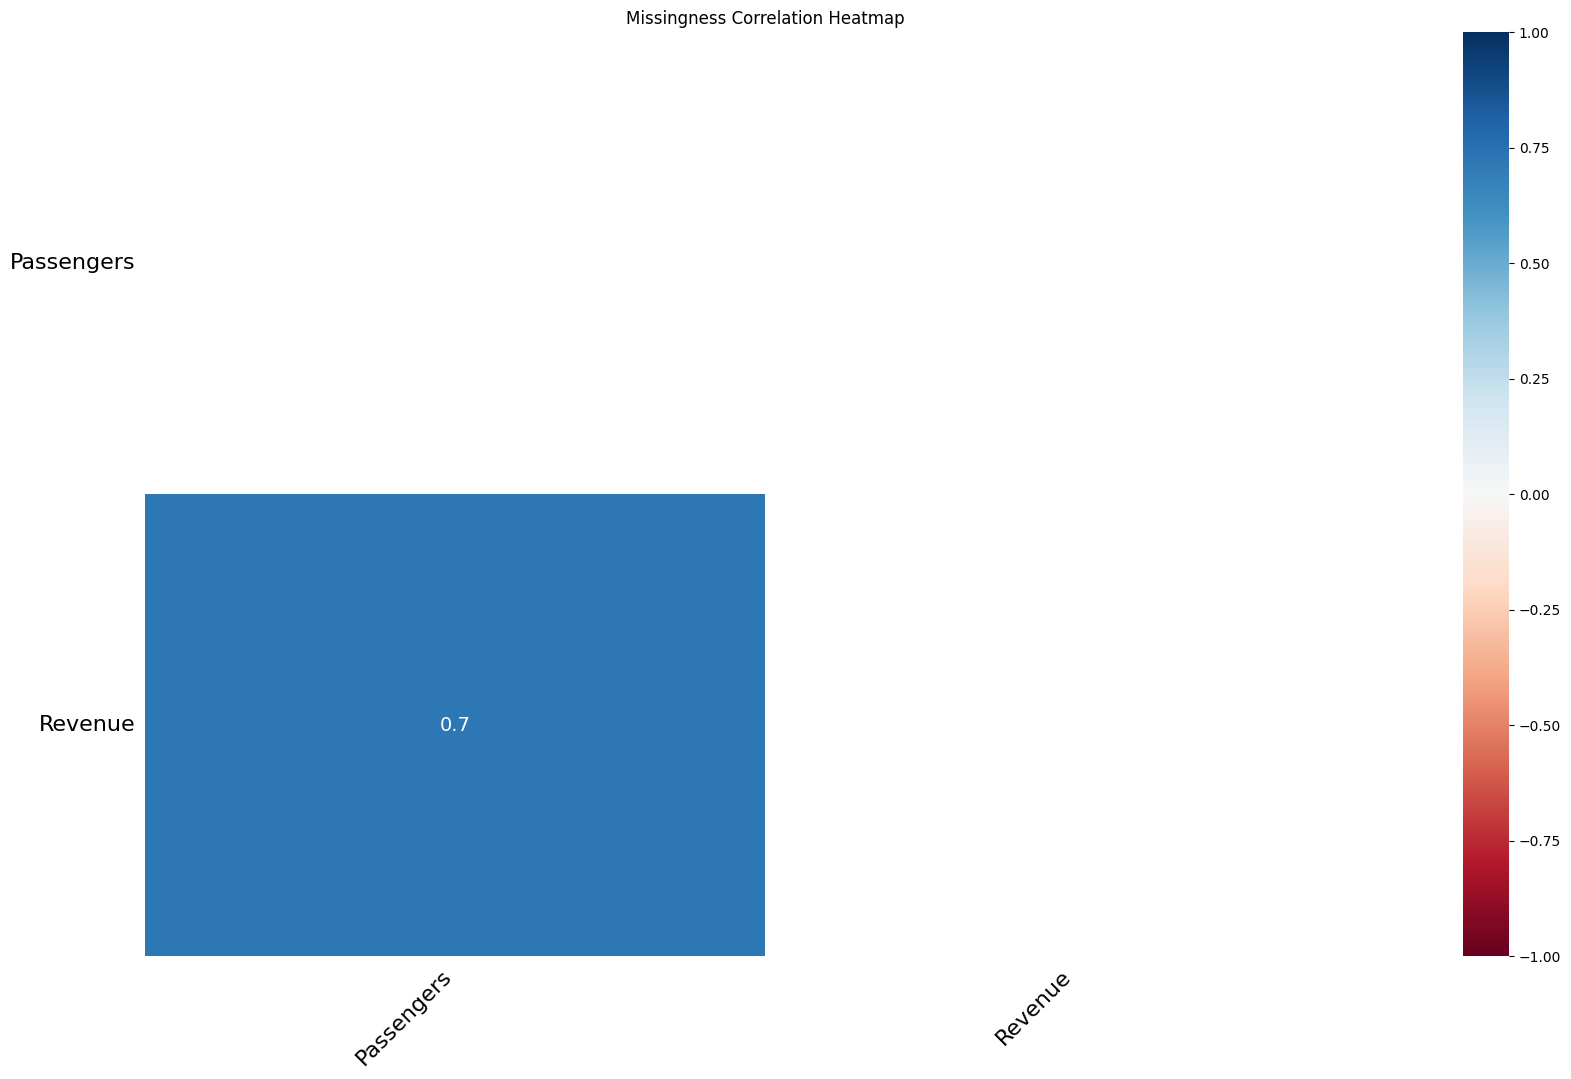

Missing values summary:
 Month          0
Passengers     6
Revenue       11
dtype: int64
After dropping, shape: (133, 3)

Imputed Data Preview:
      Month  Passengers  Passengers_mean  Passengers_iter      Revenue  \
0   1949-01       112.0       112.000000       112.000000  1119.645817   
1   1949-02       118.0       118.000000       118.000000  1202.140262   
2   1949-03       132.0       132.000000       132.000000  1311.500999   
3   1949-04       129.0       129.000000       129.000000  1350.280952   
4   1949-05       121.0       121.000000       121.000000  1261.325618   
5   1949-06       135.0       135.000000       135.000000          NaN   
6   1949-07       148.0       148.000000       148.000000          NaN   
7   1949-08       148.0       148.000000       148.000000          NaN   
8   1949-09       136.0       136.000000       136.000000          NaN   
9   1949-10       119.0       119.000000       119.000000          NaN   
10  1949-11         NaN       287.130435  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer
# Load sample dataset with missing values
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
df.columns = ['Month', 'Passengers']  # Rename for clarity
# Create artificial missingness for demonstration
df.loc[10:15, 'Passengers'] = np.nan
df['Revenue'] = df['Passengers'] * 10 + np.random.normal(0, 50, size=len(df))
df.loc[5:10, 'Revenue'] = np.nan
# Visualize missingness
msno.bar(df)
plt.title("Missing Values per Column")
plt.savefig("missing_bar.png")
plt.show()
msno.matrix(df)
plt.title("Missingness Matrix")
plt.savefig("missing_matrix.png")
plt.show()
msno.heatmap(df)
plt.title("Missingness Correlation Heatmap")
plt.savefig("missing_heatmap.png")
plt.show()
# Basic stats
print("Missing values summary:\n", df.isnull().sum())
# Strategy 1: Drop rows with missing values
df_dropped = df.dropna()
print(f"After dropping, shape: {df_dropped.shape}")
# Strategy 2: Simple mean imputation
simple_imputer = SimpleImputer(strategy='mean')
df['Passengers_mean'] = simple_imputer.fit_transform(df[['Passengers']])
df['Revenue_mean'] = simple_imputer.fit_transform(df[['Revenue']])
# Strategy 3: Median imputation per group (simulate grouping by month)
df['Month_num'] = pd.to_datetime(df['Month']).dt.month
df['Revenue_median_group'] = df.groupby('Month_num')['Revenue'].transform(lambda x: x.fillna(x.median()))
# Strategy 4: Multivariate imputation
multi_imputer = IterativeImputer(random_state=0)
df[['Passengers_iter', 'Revenue_iter']] = multi_imputer.fit_transform(df[['Passengers', 'Revenue']])
# Strategy 5: Indicator for missing values
df['Revenue_missing'] = df['Revenue'].isna().astype(int)
df['Passengers_missing'] = df['Passengers'].isna().astype(int)
# Display final preview
print("\nImputed Data Preview:")
print(df[['Month', 'Passengers', 'Passengers_mean', 'Passengers_iter',
          'Revenue', 'Revenue_mean', 'Revenue_median_group', 'Revenue_iter',
          'Revenue_missing', 'Passengers_missing']].head(12))
# Save to CSV
df.to_csv("imputed_output.csv", index=False)